In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Customer.xlsx')
df.head()

,Age,Payment Method,Churn,LastTransaction
0,64,credit card,loyal,98
1,35,cheque,churn,118
2,25,credit card,loyal,107
3,39,credit card,NaN,177
4,39,credit card,loyal,90


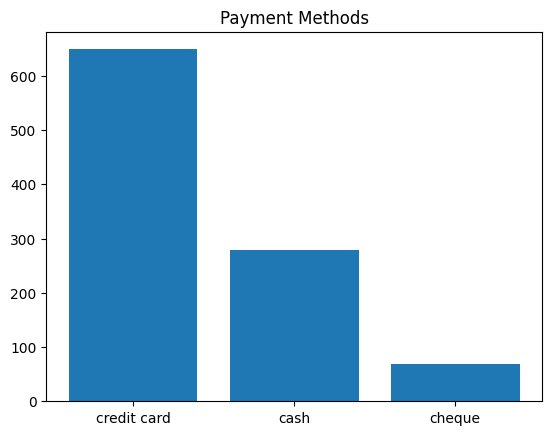

In [3]:
payment_counts = df['Payment Method'].value_counts()
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Payment Methods')
plt.show()

In [4]:
df.dropna(inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['LastTransaction'] = scaler.fit_transform(df[['LastTransaction']])

df.head()

,Age,Payment Method,Churn,LastTransaction
0,64,credit card,loyal,0.436937
1,35,cheque,churn,0.527027
2,25,credit card,loyal,0.477477
4,39,credit card,loyal,0.400901
5,28,cheque,churn,0.846847


In [6]:
#replace
df['Payment Method'] = df['Payment Method'].replace({'credit card':0, 'cheque':1, 'cash':2})
df.head()

,Age,Payment Method,Churn,LastTransaction
0,64,0,loyal,0.436937
1,35,1,churn,0.527027
2,25,0,loyal,0.477477
4,39,0,loyal,0.400901
5,28,1,churn,0.846847


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
train_conf = confusion_matrix(y_train, y_pred_train)
test_conf = confusion_matrix(y_test, y_pred_test)

print('Train accuracy: ', train_acc)
print('Test accuracy: ', test_acc)
print('\nConfusion Matrix (Train): \n', train_conf)
print('Confusion Matrix (Test): \n', test_conf)

Train accuracy:  0.6476190476190476
Test accuracy:  0.6814814814814815

Confusion Matrix (Train): 
 [[ 85 140]
 [ 82 323]]
Confusion Matrix (Test): 
 [[ 38  59]
 [ 27 146]]
